In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from randombp import BackProp4Layer, RandomFeedback4Layer, DirectFeedbackNet

In [2]:
# Load MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
# Four-layer networks
bp4 = BackProp4Layer([200,100])
rfn4 = RandomFeedback4Layer([200,100])
dfb4 = DirectFeedbackNet([200,100])

In [4]:
# Start tensorflow session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [5]:
acc_rf4 = rfn4.layerwise_exp(sess, mnist, lr=0.5, decay=0.)

In [6]:
acc_df4 = dfb4.layerwise_exp(sess, mnist, lr=0.5, decay=0.)

In [7]:
acc_bp4 = bp4.layerwise_exp(sess, mnist, lr=0.5, decay=0.)

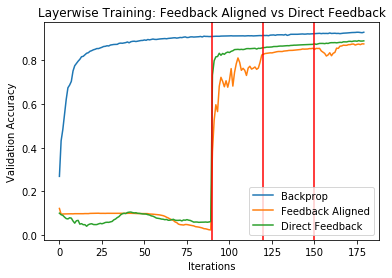

In [8]:
plt.title('Layerwise Training: Feedback Aligned vs Direct Feedback')
plt.plot(acc_bp4, label="Backprop")
plt.plot(acc_rf4, label="Feedback Aligned")
plt.plot(acc_df4, label="Direct Feedback")
for i in [30*3,30*3+30,30*3+60]:
    plt.axvline(x=i, color='r')
plt.xlabel("Iterations")
plt.ylabel("Validation Accuracy")
plt.legend()